### Bet Sizing from Predicted Probabilities

$p(x)$는 label $x$가 나타날 확률이라고 표기하자. 두 가지 가능한 출력 $x \in \{-1, 1\}$에 대해 귀무가설 $H_0 : p[x = 1] = \frac{1}{2}$을 검정해 보려고 한다. 검정 통계량 $z = \frac{p[x = 1]  -\frac{1}{2}}{\sqrt{p[x=1](1 - p[x=1])}} = \frac{2p[x = 1] - 1}{2\sqrt{p[x=1](1 - p[x=1])}} \sim Z, z\in \left( -\infty, +\infty \right)$을 계산한다. $Z$는 표준 정규 분포를 나타낸다. 베팅 크기는 $m = 2Z[z] - 1$로 도출하고, $m \in [-1, 1]$이며 $Z[.]$는 $Z$의 누적 분포 함수이다.

가능한 결과의 개수가 2개를 넘을 때에는 OVR 방법을 사용한다. $X = \{-1, \dots, 0, \dots, 1\}$가 베팅 크기에 연계된 다양한 label이라 하고, $x \in X$를 예측된 label이라고 하자. 다시 말해 label은 label과 연계된 베팅 크기에 의해 식별된다. 각 label $i = 1, \dots, \Vert X \Vert$에 대해 $p_i$를 추정한다. 단 $\sum_{i=1}^{\Vert X \Vert} p_i = 1$이다. $\tilde{p} = \max_i \{p_i\}$을 $x$의 확률로 정의하고 $H_0 : \tilde{p} = \frac{1}{\Vert X \Vert}$를 테스트해 보자

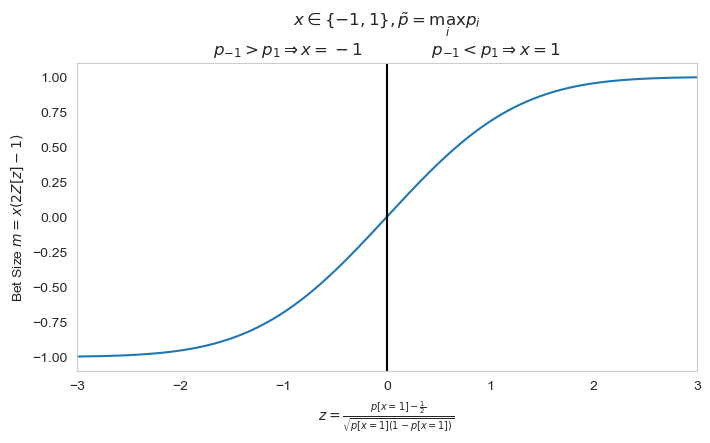

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

p_x1 = np.linspace(0, 1, 500)
eps = 1e-10
p_x1 = np.clip(p_x1, eps, 1 - eps)
z = (2 * p_x1 - 1) / (2 * np.sqrt(p_x1 * (1 - p_x1)))
m = 2 * norm.cdf(z) - 1

plt.figure(figsize=(8, 4))
plt.plot(z, m)
plt.axvline(x=0, color='black', linestyle='-')
plt.xlabel(r'$z = \frac{p[x = 1]  -\frac{1}{2}}{\sqrt{p[x=1](1 - p[x=1])}}$')
plt.xlim([-3, 3])
plt.grid(False)
plt.ylabel(r'Bet Size $m = x(2Z[z] - 1)$')
plt.title(r'$x \in \{-1, 1\}, \tilde{p} = \max_i p_i$' + '\n' + r'$p_{-1} > p_1 \Rightarrow x = -1$' + '\t' + '\t' + r'$p_{-1} < p_1 \Rightarrow x = 1$')

plt.show()